# Machine_ESID2018
- windows_time_1day 
- 2018 = 86880 rows (33.15%)
- 2017 = 175200 rows (66.85%)
- 2017-2018 = 262080 rows (100%)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:
path = "./data/"

In [4]:
filename_read = os.path.join(path,"DATA_RNN_EECU.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

In [5]:
df.index = df['date_time']

In [6]:
df.drop(('date_time'), axis=1, inplace=True)

In [7]:
df.shape

(262080, 6)

In [8]:
df.head(2)

,I,T,UV,WS,RH,P
date_time,,,,,,
2017-01-01 00:00:00,0.0,26.6,0.0,4.0,58.6,0.0
2017-01-01 00:03:00,0.0,26.6,0.0,3.8,57.7,0.0


In [9]:
df.tail(2)

,I,T,UV,WS,RH,P
date_time,,,,,,
2018-06-30 23:54:00,0.0,24.5,0.0,0.0,67.7,0.0
2018-06-30 23:57:00,0.0,24.5,0.0,3.1,67.7,0.0


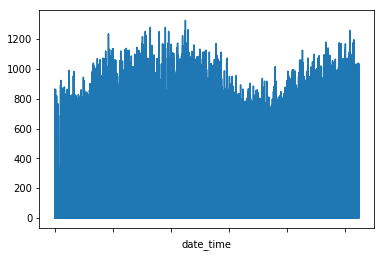

In [10]:
df['I'].plot()

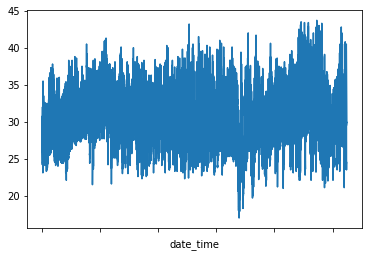

In [11]:
df['T'].plot()

In [12]:
df.values.shape

(262080, 6)

In [13]:
df.values.shape

(262080, 6)

In [14]:
df.head(1)

,I,T,UV,WS,RH,P
date_time,,,,,,
2017-01-01 00:00:00,0.0,26.6,0.0,4.0,58.6,0.0


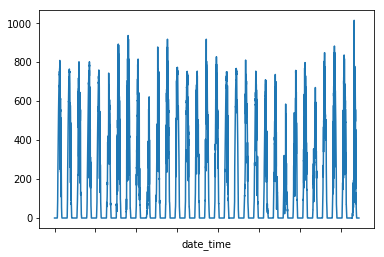

In [15]:
df['I']['2018-01':'2018-02'].plot()

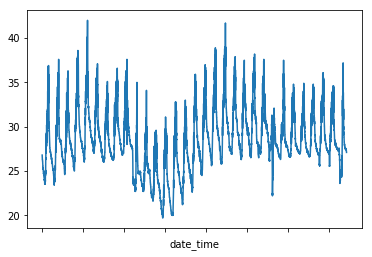

In [16]:
df['T']['2018-01':'2018-02'].plot()

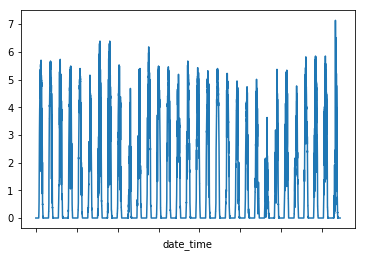

In [17]:
df['P']['2018-01':'2018-02'].plot()

In [18]:
df.head(2)

,I,T,UV,WS,RH,P
date_time,,,,,,
2017-01-01 00:00:00,0.0,26.6,0.0,4.0,58.6,0.0
2017-01-01 00:03:00,0.0,26.6,0.0,3.8,57.7,0.0


In [19]:
df.index = df.index.astype('datetime64[ns]')

In [20]:
print(df.index)

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:03:00',
               '2017-01-01 00:06:00', '2017-01-01 00:09:00',
               '2017-01-01 00:12:00', '2017-01-01 00:15:00',
               '2017-01-01 00:18:00', '2017-01-01 00:21:00',
               '2017-01-01 00:24:00', '2017-01-01 00:27:00',
               ...
               '2018-06-30 23:30:00', '2018-06-30 23:33:00',
               '2018-06-30 23:36:00', '2018-06-30 23:39:00',
               '2018-06-30 23:42:00', '2018-06-30 23:45:00',
               '2018-06-30 23:48:00', '2018-06-30 23:51:00',
               '2018-06-30 23:54:00', '2018-06-30 23:57:00'],
              dtype='datetime64[ns]', name='date_time', length=262080, freq=None)


In [21]:
df['Day'] = df.index.dayofyear
df['Hour'] = df.index.hour
df['minute'] = df.index.minute

In [22]:
df.head(2)

,I,T,UV,WS,RH,P,Day,Hour,minute
date_time,,,,,,,,,
2017-01-01 00:00:00,0.0,26.6,0.0,4.0,58.6,0.0,1,0,0
2017-01-01 00:03:00,0.0,26.6,0.0,3.8,57.7,0.0,1,0,3


In [23]:
df.tail(2)

,I,T,UV,WS,RH,P,Day,Hour,minute
date_time,,,,,,,,,
2018-06-30 23:54:00,0.0,24.5,0.0,0.0,67.7,0.0,181,23,54
2018-06-30 23:57:00,0.0,24.5,0.0,3.1,67.7,0.0,181,23,57


In [24]:
target_names = ['P']

In [25]:
shift_days = 1
shift_hours = 1*24 # Number of hours.
shift_minutes = shift_hours*60 # Number of minutes.
shift_steps = int(shift_minutes / 3)  # Number of 3 minute.

In [26]:
shift_steps

480

In [27]:
df_targets = df[target_names].shift(-shift_steps)

In [28]:
df_targets.head(5)

,P
date_time,
2017-01-01 00:00:00,0.0
2017-01-01 00:03:00,0.0
2017-01-01 00:06:00,0.0
2017-01-01 00:09:00,0.0
2017-01-01 00:12:00,0.0


In [29]:
df_targets.tail()

,P
date_time,
2018-06-30 23:45:00,NaN
2018-06-30 23:48:00,NaN
2018-06-30 23:51:00,NaN
2018-06-30 23:54:00,NaN
2018-06-30 23:57:00,NaN


In [30]:
x_data = df.values[0:-shift_steps]

In [31]:
x_data

array([[  0. ,  26.6,   0. , ...,   1. ,   0. ,   0. ],
       [  0. ,  26.6,   0. , ...,   1. ,   0. ,   3. ],
       [  0. ,  26.5,   0. , ...,   1. ,   0. ,   6. ],
       ...,
       [  0. ,  28.1,   0. , ..., 180. ,  23. ,  51. ],
       [  0. ,  28.1,   0. , ..., 180. ,  23. ,  54. ],
       [  0. ,  28.1,   0. , ..., 180. ,  23. ,  57. ]])

In [32]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (261600, 9)


In [33]:
x_data_dataframe = pd.DataFrame(x_data)

In [34]:
x_data_dataframe.head(2)

,0,1,2,3,4,5,6,7,8
0,0.0,26.6,0.0,4.0,58.6,0.0,1.0,0.0,0.0
1,0.0,26.6,0.0,3.8,57.7,0.0,1.0,0.0,3.0


In [35]:
y_data = df_targets.values[:-shift_steps]

In [36]:
y_data

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [37]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (261600, 1)


In [38]:
num_data = len(x_data)
num_data

261600

In [39]:
train_split = 0.6685

In [40]:
num_train = int(train_split * num_data)
num_train

174879

In [41]:
num_test = num_data - num_train
num_test

86721

In [42]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

261600

In [43]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

261600

In [44]:
y_train

array([[0.  ],
       [0.  ],
       [0.  ],
       ...,
       [0.36],
       [0.39],
       [0.39]])

In [45]:
y_test

array([[0.45],
       [0.6 ],
       [0.78],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [46]:
num_x_signals = x_data.shape[1]
num_x_signals

9

In [47]:
num_y_signals = y_data.shape[1]
num_y_signals

1

In [48]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 1326.0


In [49]:
x_scaler = MinMaxScaler()

In [50]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [51]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [52]:
x_test_scaled = x_scaler.transform(x_test)

In [53]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [54]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(174879, 9)
(174879, 1)


In [55]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [56]:
batch_size = 64

In [57]:
sequence_length = int(24 * 7 * 8 * 60 / 3)
sequence_length

26880

In [58]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [59]:
x_batch, y_batch = next(generator)

In [60]:
seq_test = x_batch[1, :, :]

In [61]:
seq_test.shape

(26880, 9)

In [62]:
type(x_batch)

numpy.ndarray

In [63]:
print(x_batch.shape)
print(y_batch.shape)

(64, 26880, 9)
(64, 26880, 1)


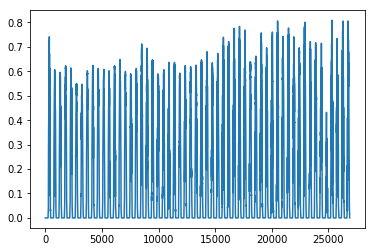

In [64]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

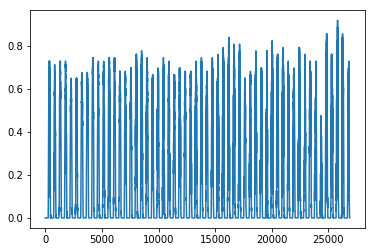

In [65]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [66]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [67]:
validation_data

(array([[[0.16289593, 0.35114504, 0.02439024, ..., 1.        ,
          0.30434783, 1.        ],
         [0.16968326, 0.35496183, 0.03252033, ..., 1.        ,
          0.34782609, 0.        ],
         [0.1719457 , 0.36259542, 0.03252033, ..., 1.        ,
          0.34782609, 0.05263158],
         ...,
         [0.        , 0.42366412, 0.        , ..., 0.49175824,
          1.        , 0.89473684],
         [0.        , 0.42366412, 0.        , ..., 0.49175824,
          1.        , 0.94736842],
         [0.        , 0.42366412, 0.        , ..., 0.49175824,
          1.        , 1.        ]]]), array([[[0.05952381],
         [0.07936508],
         [0.1031746 ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]]))

In [100]:
model = Sequential()

In [101]:
model.add(GRU(units=64,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

In [102]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [103]:
#from tensorflow.python.keras.initializers import RandomUniform
#init = RandomUniform(minval=-0.05, maxval=0.05)
#model.add(Dense(num_y_signals,activation='linear',kernel_initializer=init))

In [104]:
warmup_steps = 50

In [105]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [106]:
optimizer = RMSprop(lr=1e-3)

In [108]:
#model.compile(loss=loss_mse_warmup, optimizer=optimizer)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 64)          14208     
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           65        
Total params: 14,273
Trainable params: 14,273
Non-trainable params: 0
_________________________________________________________________


In [110]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [111]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [112]:
#callback_tensorboard = TensorBoard(log_dir='./23_logs/',
#                                   histogram_freq=0,
#                                   write_graph=False)

In [113]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [114]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_reduce_lr]

In [115]:
#%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 21s - loss: 0.0291
Epoch 00001: val_loss improved from inf to 0.01550, saving model to 23_checkpoint.keras
100/100 [==============================] - 2174s 22s/step - loss: 0.0290 - val_loss: 0.0155
Epoch 2/20
 99/100 [============================>.] - ETA: 21s - loss: 0.0146
Epoch 00002: val_loss improved from 0.01550 to 0.01344, saving model to 23_checkpoint.keras
100/100 [==============================] - 2174s 22s/step - loss: 0.0146 - val_loss: 0.0134
Epoch 3/20
 99/100 [============================>.] - ETA: 21s - loss: 0.0137
Epoch 00003: val_loss improved from 0.01344 to 0.01324, saving model to 23_checkpoint.keras
100/100 [==============================] - 2177s 22s/step - loss: 0.0136 - val_loss: 0.0132
Epoch 4/20
 99/100 [============================>.] - ETA: 21s - loss: 0.0130
Epoch 00004: val_loss improved from 0.01324 to 0.01273, saving model to 23_checkpoint.keras
100/100 [==============================] - 2179s

In [116]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [117]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 8s 8s/step


In [118]:
print("loss (test-set):", result)

loss (test-set): 0.011990653350949287


In [119]:
# save entire network to HDF5 (save everything, suggested)
model.save(os.path.join(path,"RNN_train_2017_test_2018.h5"))

In [120]:
# save neural network structure to JSON (no weights)# save n 
model_json = model.to_json()
with open(os.path.join(path,"RNN_train_2017_test_2018.json"), "w") as json_file:
    json_file.write(model_json)

In [121]:
# save neural network structure to YAML (no weights)
model_yaml = model.to_yaml()
with open(os.path.join(path,"RNN_train_2017_test_2018.yaml"), "w") as yaml_file:
    yaml_file.write(model_yaml)

# loadModel

In [122]:
from keras.models import load_model
model2 = load_model(os.path.join(path,"RNN_train_2017_test_2018.h5"))

In [123]:
result2 = model2.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 7s 7s/step


In [124]:
print("loss (test-set):", result2)

loss (test-set): 0.011990653350949287


In [125]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [126]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

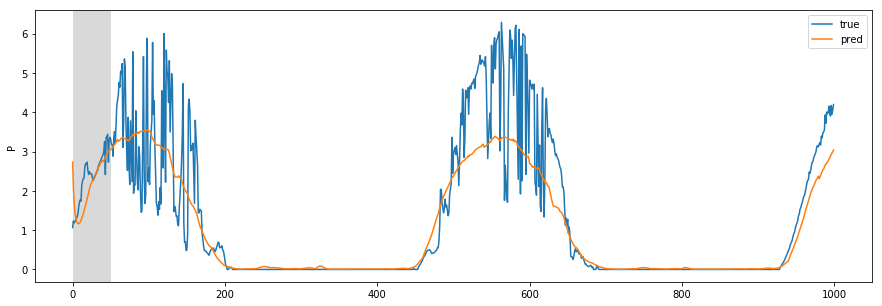

In [131]:
plot_comparison(start_idx=100000, length=1000, train=True)

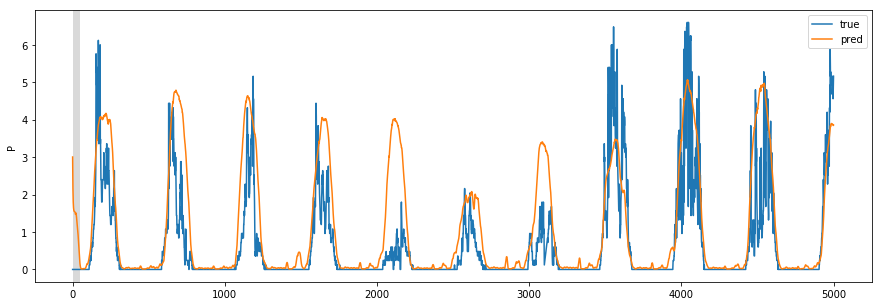

In [135]:
plot_comparison(start_idx=1000, length=5000, train=True)